In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
path1 = '/content/drive/MyDrive/Internship /chest_xray/train'
path2 = '/content/drive/MyDrive/Internship /chest_xray/test'

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    path1,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 4182 images belonging to 2 classes.


In [16]:
validation_gen = train_datagen.flow_from_directory(
    path2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 124 images belonging to 2 classes.


In [18]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(train_generator, epochs=5, validation_data=validation_gen,
batch_size= 32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8207 - loss: 0.4709

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 550s 4s/step - accuracy: 0.8213 - loss: 0.4693 - val_accuracy: 0.7097 - val_loss: 0.8420
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 493s 4s/step - accuracy: 0.9584 - loss: 0.1133 - val_accuracy: 0.6774 - val_loss: 1.0694
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 488s 4s/step - accuracy: 0.9635 - loss: 0.0901 - val_accuracy: 0.7661 - val_loss: 0.6726
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 492s 4s/step - accuracy: 0.9796 - loss: 0.0588 - val_accuracy: 0.7661 - val_loss: 0.9086
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.9849 - loss: 0.0458 - val_accuracy: 0.7339 - val_loss: 1.1618


In [23]:
model.save('/content/drive/MyDrive/bt2/chestxray.h5'),
print("Model Loaded")

Model Loaded


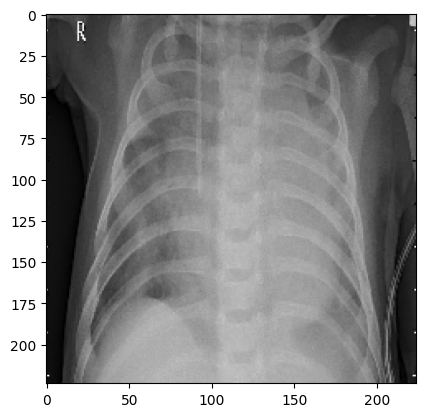

In [39]:
testpath="/content/drive/MyDrive/Internship /chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg"
img=image.load_img(testpath,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [42]:
im_arr=image.img_to_array(img)
im_arr=np.expand_dims(im_arr,axis=0)
im_arr /= 255.

fin = model.predict(im_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [43]:
if fin >= 0.5:
  print("Pneumonia positive")
else:
  print("Normal")

Pneumonia positive
